### Mean Reversion Portfolio with OU process

위험이 존재하는 자산 $S^{(1)}$의 포지션$\alpha = \frac{A}{S_0^{(1)}}$을 보유하고, 이와 비슷한 양상을 보이는 자산 $S^{(2)}$의 매도 포지션 $\beta = \frac{B}{S_0^{(2)}}$를 가지는 mean reverting portfolio를 가지고 있다고 가정하자. 포트폴리오 가치는 다음과 같이 구할 수 있다.

$$X_{t}^{\alpha, \beta} = \alpha S^{(1)} - \beta S^{(2)}, t \geq 0$$

두 자산 $S^{(1)}$와 $S^{(2)}$은 통계적으로 같이 움직이는 상관관게가 존재한다고 가정한다 (공적분 관계에 있다고 보면 좋다). 

In [51]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

START_DATE = '2015-01-01'
END_DATE = pd.to_datetime('today')
TICKER = ['005930.KS','005935.KS']

data = yf.download(
    TICKER,
    start = START_DATE,
    end = END_DATE,
    interval = '1d',
    progress = False
)['Close']

In [52]:
from statsmodels.tsa.stattools import coint

score, p_value, _ = coint(
    data['005930.KS'].pct_change().dropna(), 
    data['005935.KS'].pct_change().dropna()
)
print('Correlation : %.4f' % data['005930.KS'].pct_change().dropna().corr(data['005935.KS'].pct_change().dropna()))
print('Cointegration test p-value : %.4f' % p_value)
print('Cointegration test score : %.4f'  % score)

Correlation : 0.8408
Cointegration test p-value : 0.0000
Cointegration test score : -23.6974


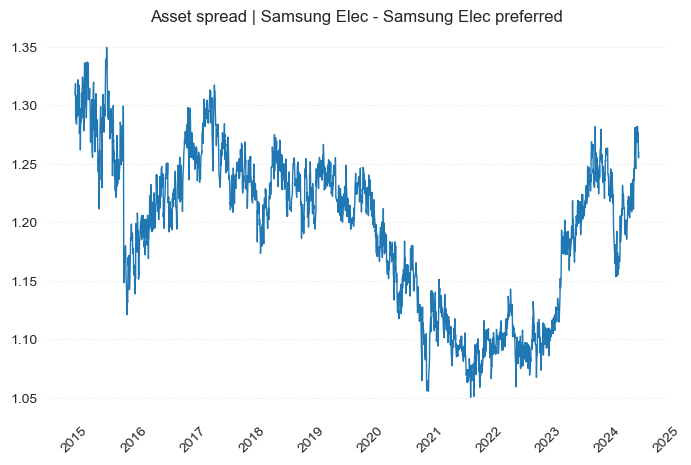

In [53]:
spread = data['005930.KS'] / data['005935.KS']

fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(
    spread.index,
    spread,
    lw = 1
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.xticks(rotation = 45)
plt.title('Asset spread | Samsung Elec - Samsung Elec preferred')
plt.show()

#### 횡보장인 경우

2017년부터 2019년 사이의 삼성전자-삼성전자우의 페어는 횡보 국면을 보이므로 아래와 같이 시뮬레이션을 할 수 있다

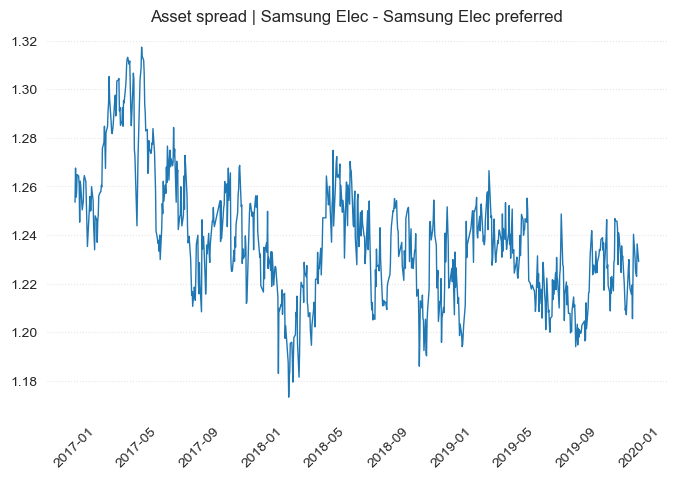

In [54]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(
    spread.loc['2017':'2019'].index,
    spread.loc['2017':'2019'],
    lw = 1
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.xticks(rotation = 45)
plt.title('Asset spread | Samsung Elec - Samsung Elec preferred')
plt.show()

In [55]:
from FinancialMachineLearning.backtest.backtest_synthetic_data import *

params = get_OU_params(spread.loc['2017':'2019'])
print(params)

{'forecast': 0.21277011864553097, 'phi': 0.9198357340601951, 'sigma': 0.00808180171396156, 'half life': 8.29518585965048}


In [95]:
rPT = rSLm = np.linspace(0, 10, 41)
nIter = int(1e5)
maxHP = 20
seed = spread.loc['2017':'2019'].mean()

phi = 2 ** (-1. / params['half life'])
forecast = params['forecast']
sigma = params['sigma'] * 100

In [96]:
output = synthetic_simulation(phi, forecast, sigma, nIter, maxHP, rPT, rSLm, seed)
sharpe_grid = get_sharpe_grid(output, rPT, rSLm)

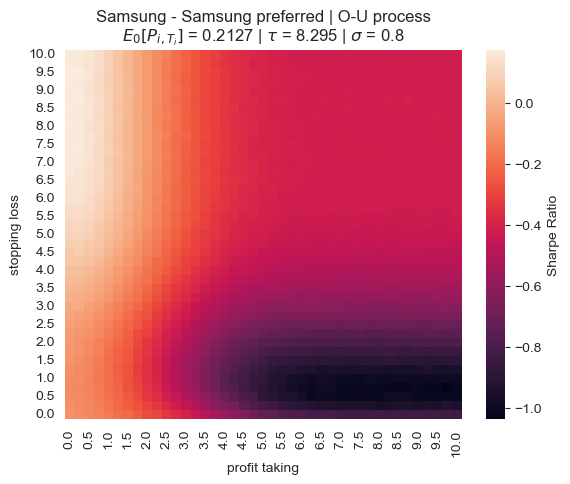

In [97]:
sns.heatmap(sharpe_grid, cbar_kws={"label": "Sharpe Ratio"})
plt.title('Samsung - Samsung preferred | O-U process\n'+r'$E_0[P_{i, T_i}]$ = 0.2127 | $\tau$ = 8.295 | $\sigma$ = 0.8')
plt.xlabel('profit taking')
plt.ylabel('stopping loss')
plt.show()

#### 양의 상승장인 경우

2023년은 두 자산의 스프레드가 상승하는 국면이다.

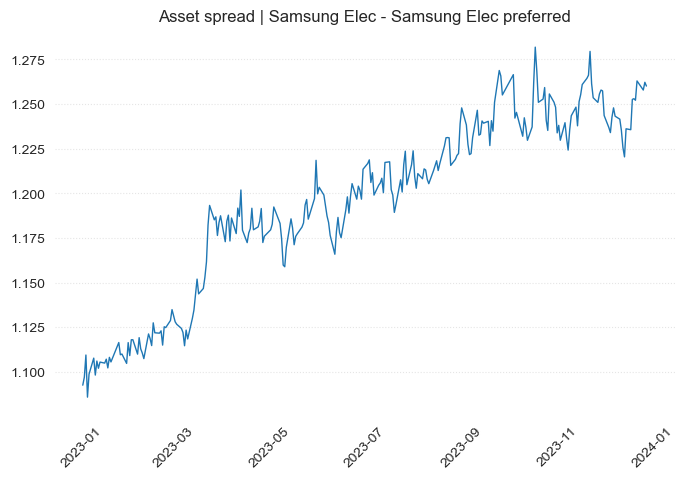

In [35]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(
    spread.loc['2023'].index,
    spread.loc['2023'],
    lw = 1
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.xticks(rotation = 45)
plt.title('Asset spread | Samsung Elec - Samsung Elec preferred')
plt.show()

In [36]:
params = get_OU_params(spread.loc['2023'])
print(params)

{'forecast': 0.177525785331679, 'phi': 0.9759724689414349, 'sigma': 0.00785313738994158, 'half life': 28.5000617381229}


In [37]:
rPT = rSLm = np.linspace(0, 10, 41)
nIter = int(1e5)
maxHP = 20
seed = spread.loc['2023'].mean()

phi = 2 ** (-1. / params['half life'])
forecast = params['forecast']
sigma = params['sigma'] * 100

In [38]:
output = synthetic_simulation(phi, forecast, sigma, nIter, maxHP, rPT, rSLm, seed)
sharpe_grid = get_sharpe_grid(output, rPT, rSLm)

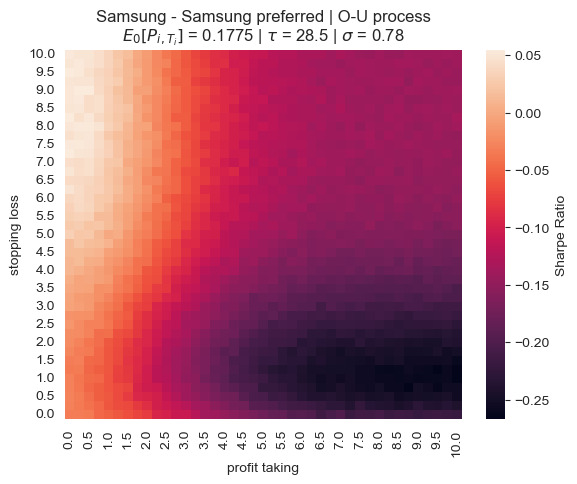

In [40]:
sns.heatmap(sharpe_grid, cbar_kws={"label": "Sharpe Ratio"})
plt.title('Samsung - Samsung preferred | O-U process\n'+r'$E_0[P_{i, T_i}]$ = 0.1775 | $\tau$ = 28.5 | $\sigma$ = 0.78')
plt.xlabel('profit taking')
plt.ylabel('stopping loss')
plt.show()